# Energy Impact Partners
#### Processing data for XGBoost Model #1
1. Imports and Pandas Settings

1. Loading in dataset to pandas dataframe

1. Dropping List Id and Company Id columns

1. Checking for Null values in Target column

1. Dropping rows with Null values in Target column

1. Target Variable Class distribution

1. Naive Model Accuracy = 36.2%

1. Summary statistics

1. Histogram plots of features distributions

1. Correlations plot

1. Optional cells

1. Split Features and Target Variable into different dataframes (X and Y)

1. Train-Test-Split of data

1. Saving DataFrames to csv files for access in training notebook

## 1. Imports and pandas settings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Pandas Settings
pd.set_option("max_colwidth", 150)
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', None)
# pd.set_option("max_colwidth", 250)

## 2. Loading in dataset to pandas dataframe

In [2]:
df_1 = pd.read_excel('./original data/Model1_Apr2022_Data.xlsx')
display(df_1.head(2))

,Affinity Row ID,Organization ID,Name,Organization URL,Pitchbook_ID,followerCount,employeesOnLinkedIn,Primary Industry Group,Total Raised,HQ Global Sub Region,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,VC_Next6Months.1
0,26002779.0,1665719.0,Aircall,aircall.io,81891-91,36528,728.0,Software,193.14,North America,24.0,0.0166,0.2067,37.85,0.0022,2,1,1,0.0,3.0,1,8.0,1,2,237.0,1.0,0.325549,14.0,0.121739,0
1,42222110.0,280864381.0,011h,011h.com,455073-49,6949,55.0,Commercial Services,9.56,Southern Europe,5.0,-0.0078,0.0000,1.53,0.0226,0,0,0,2.0,17.0,1,2.0,0,1,8.0,1.0,0.145455,5.0,0.108696,1


## 3. Dropping List ID and Company ID columns

In [3]:
df_2 = df_1.drop([], axis=1)
display(df_2.shape)
display(df_2.head(2))

(2284, 30)

,Affinity Row ID,Organization ID,Name,Organization URL,Pitchbook_ID,followerCount,employeesOnLinkedIn,Primary Industry Group,Total Raised,HQ Global Sub Region,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,VC_Next6Months.1
0,26002779.0,1665719.0,Aircall,aircall.io,81891-91,36528,728.0,Software,193.14,North America,24.0,0.0166,0.2067,37.85,0.0022,2,1,1,0.0,3.0,1,8.0,1,2,237.0,1.0,0.325549,14.0,0.121739,0
1,42222110.0,280864381.0,011h,011h.com,455073-49,6949,55.0,Commercial Services,9.56,Southern Europe,5.0,-0.0078,0.0000,1.53,0.0226,0,0,0,2.0,17.0,1,2.0,0,1,8.0,1.0,0.145455,5.0,0.108696,1


## 4. Checking for Null values in Target Variable

In [4]:
# printing the % of missing values in target
print(df_2['VC_Next6Months.1'].isnull().sum() / len(df_2) *100)

0.0


## 5. Dropping rows with NaN in Target column

In [5]:
print(f'Rows before drop: {df_2.shape[0]}')

df_3 = df_2.dropna(subset = ['VC_Next6Months.1'])

print(f'Rows available to use after drop: {df_3.shape[0]}')

Rows before drop: 2284
Rows available to use after drop: 2284


## 6. Target Variable Class distribution

[2080, 204, 0, 0, 0]


C:\Users\GeronimoUeffing\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


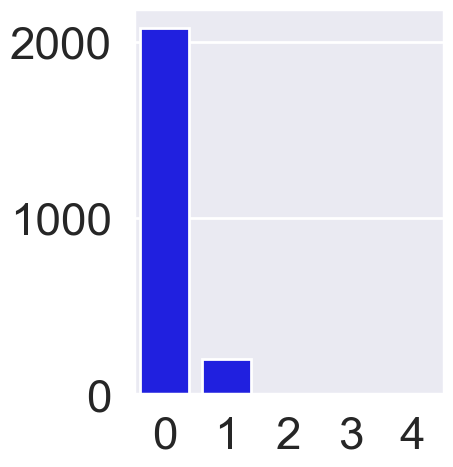

In [6]:
target_var_class_distribution = []
for i in range(5):
    target_var_class_distribution.append(len((df_3[df_3['VC_Next6Months.1'] == i])))


sns.set_style('darkgrid')
plt.figure(figsize=(4,5))
sns.set_context('poster', font_scale =1.5)


x_labels = ['0', '1', '2', '3', '4']
sns.barplot(x=x_labels, y=target_var_class_distribution, color ='blue')
print(target_var_class_distribution)

## 7. Naive Model Accuracy = 36.2%

In [7]:
print(f' Naive Model predicting most common class accuracy: {round(target_var_class_distribution[3] / len(df_3) * 100, 1)}%')

 Naive Model predicting most common class accuracy: 0.0%


## 8. Summary statistics

In [8]:
display(df_3.shape)
display(df_3.dtypes)
display(df_3.describe())

(2284, 30)

Affinity Row ID                           float64
Organization ID                           float64
Name                                       object
Organization URL                           object
Pitchbook_ID                               object
followerCount                               int64
employeesOnLinkedIn                       float64
Primary Industry Group                     object
Total Raised                              float64
HQ Global Sub Region                       object
# Active Investors                        float64
Growth Rate                               float64
Growth Rate % Change                      float64
Size Multiple                             float64
Size Multiple % Change                    float64
Top100VCs_count                             int64
Top100VCs_dummy                             int64
ReceivedEarlyStageFinancing_Dummy           int64
FirstFinancing_Months                     float64
LastFinancing_Months                      float64


,Affinity Row ID,Organization ID,followerCount,employeesOnLinkedIn,Total Raised,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,VC_Next6Months.1
count,2.279000e+03,2.279000e+03,2284.000000,2144.000000,1862.000000,2098.000000,2196.000000,2196.000000,2196.000000,2196.000000,2284.000000,2284.00000,2284.000000,1748.000000,1971.000000,2284.0,2276.000000,2284.000000,2284.000000,1091.000000,2281.000000,1037.000000,2251.000000,2251.000000,2284.000000
mean,2.992441e+07,1.546237e+08,5093.066988,98.498601,38.254726,6.921830,0.002261,-0.897144,11.691821,0.002449,0.439142,0.28021,0.782399,28.564645,20.754947,1.0,7.687610,0.205342,0.293345,18.463795,0.478299,0.142698,4.468681,0.116623,0.089317
std,8.095005e+06,9.830947e+07,17063.932456,1091.286363,182.824753,5.894121,0.009917,34.999475,81.866002,0.152982,0.873151,0.44920,0.412705,36.949553,19.530097,0.0,5.989034,0.953288,0.612134,57.834685,0.499638,0.161550,11.623779,0.138094,0.285263
min,2.599904e+07,1.522059e+06,7.000000,1.000000,0.000000,1.000000,-0.079600,-852.000000,0.010000,-0.716500,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.002667,0.000000,0.000000,0.000000
25%,2.600252e+07,7.884473e+07,887.750000,14.000000,2.000000,3.000000,-0.000200,-0.051200,1.020000,-0.007500,0.000000,0.00000,1.000000,9.000000,7.000000,1.0,5.000000,0.000000,0.000000,2.000000,0.000000,0.042553,0.000000,0.000000,0.000000
50%,2.600333e+07,1.618361e+08,2100.000000,30.000000,7.385000,5.000000,0.000250,0.000000,2.460000,0.000100,0.000000,0.00000,1.000000,18.000000,16.000000,1.0,7.000000,0.000000,0.000000,5.000000,0.000000,0.090909,2.000000,0.066667,0.000000
75%,3.077285e+07,2.246652e+08,4645.000000,66.000000,23.642500,9.000000,0.004300,0.000000,6.222500,0.005725,1.000000,1.00000,1.000000,34.250000,28.000000,1.0,9.000000,0.000000,0.000000,14.000000,1.000000,0.182209,5.000000,0.176471,0.000000
max,1.074792e+08,2.851885e+08,584632.000000,48990.000000,5476.250000,54.000000,0.169500,780.000000,2502.850000,5.390600,8.000000,1.00000,1.000000,383.000000,207.000000,1.0,151.000000,9.000000,4.000000,996.000000,1.000000,1.930233,285.000000,1.000000,1.000000


## 9. Histogram plots of features distributions

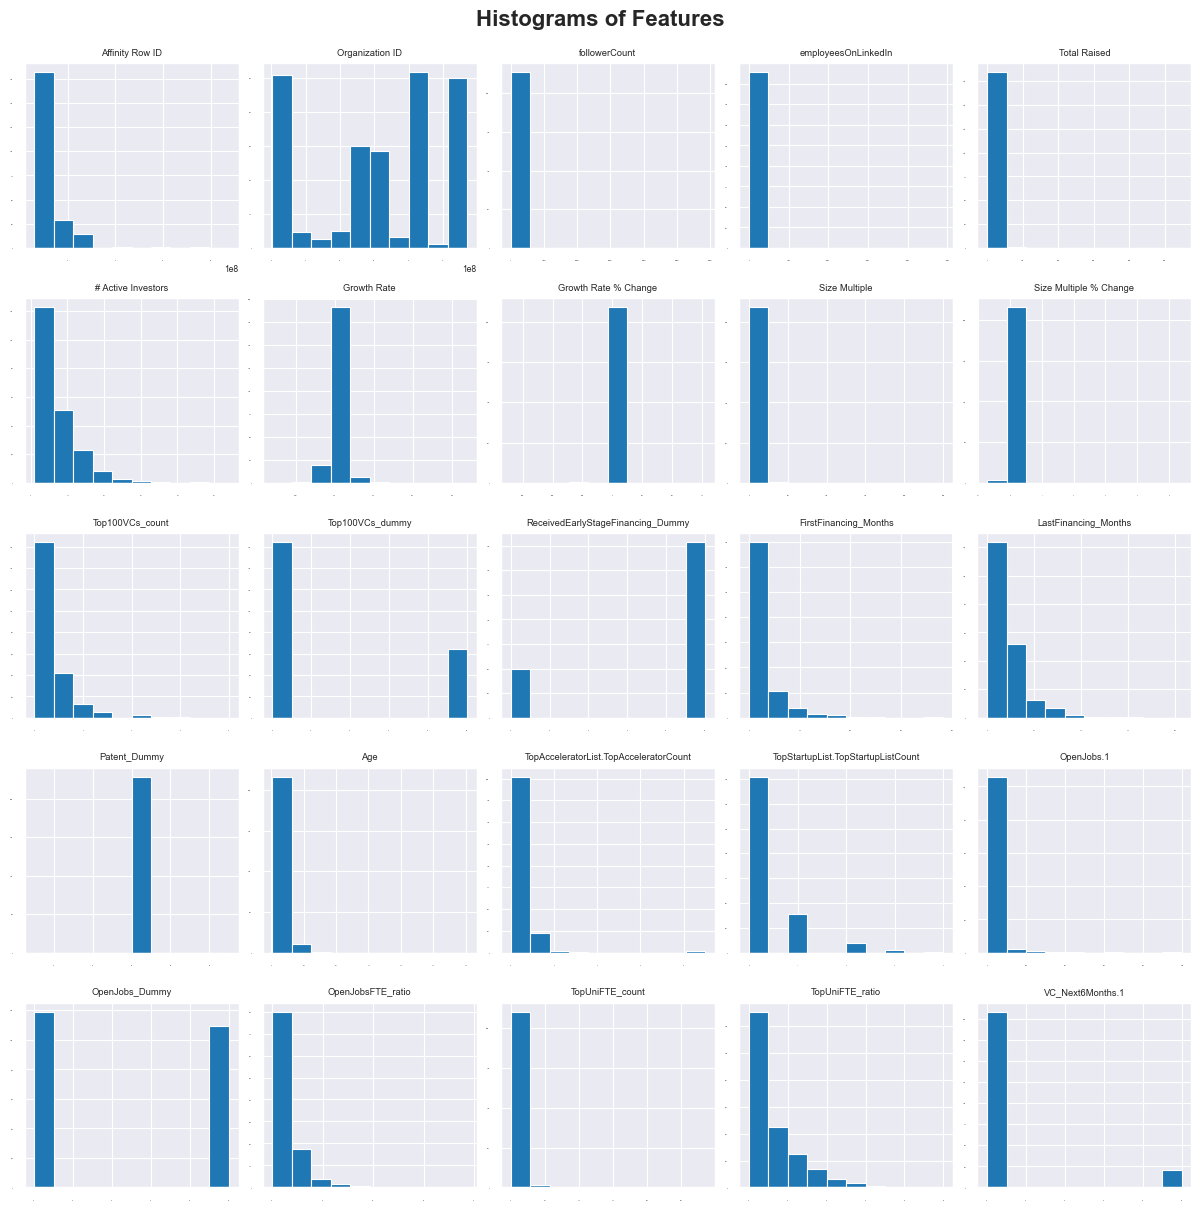

In [9]:
plt.rcParams["figure.figsize"] = (12,12)
sns.set_context('paper', font_scale =.7)

df_3.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.suptitle("Histograms of Features", y=1, size =16, fontname="Sans", weight='bold')
plt.tight_layout(pad=1)
plt.show()

## 10. Correlations plot

In [10]:
# Assuming df_3 is your DataFrame
# Select only numeric columns for the correlation calculation
numeric_df = df_3.select_dtypes(include=[np.number])

# Calculate the correlation matrix and apply the background gradient styling
correlation_matrix = numeric_df.corr().style.background_gradient(cmap='Blues')

# Display the styled correlation matrix
correlation_matrix


C:\Users\GeronimoUeffing\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\GeronimoUeffing\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Affinity Row ID,Organization ID,followerCount,employeesOnLinkedIn,Total Raised,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,VC_Next6Months.1
Affinity Row ID,1.000000,0.237439,-0.032286,-0.005284,-0.048747,-0.124045,0.020848,-0.011339,-0.034485,0.109763,-0.122751,-0.106102,-0.066843,0.035332,-0.068500,nan,-0.083866,-0.068760,-0.143443,-0.071413,-0.092121,0.087073,-0.066002,-0.058695,-0.008135
Organization ID,0.237439,1.000000,-0.124967,-0.062902,-0.081370,-0.319991,0.083945,0.029506,-0.116750,0.035932,-0.171698,-0.156139,-0.050047,-0.019293,-0.113253,nan,-0.340302,0.079667,-0.273686,-0.113615,-0.170585,0.113596,-0.088972,-0.002830,-0.004359
followerCount,-0.032286,-0.124967,1.000000,0.826538,0.473647,0.223286,0.040080,0.005089,0.201029,-0.002826,0.154321,0.105402,-0.071722,0.020195,-0.124780,nan,0.401510,-0.025594,0.209561,0.455513,0.190294,-0.020105,0.319859,0.013067,0.026719
employeesOnLinkedIn,-0.005284,-0.062902,0.826538,1.000000,0.532829,0.058137,0.017373,0.002573,0.089134,0.000676,0.042727,0.022465,-0.052969,0.026459,-0.089289,nan,0.522252,-0.011271,0.087637,0.257976,0.069824,-0.025224,0.103547,-0.016043,0.002260
Total Raised,-0.048747,-0.081370,0.473647,0.532829,1.000000,0.312573,0.044036,0.007615,0.199214,-0.000953,0.194624,0.131290,-0.064623,-0.027621,-0.111957,nan,0.034306,-0.015781,0.220480,0.610386,0.117498,0.062921,0.495471,0.050042,0.059405
# Active Investors,-0.124045,-0.319991,0.223286,0.058137,0.312573,1.000000,0.070398,-0.005381,0.188368,-0.028633,0.464848,0.369402,0.068043,-0.217695,-0.279386,nan,-0.009932,-0.022643,0.339456,0.357071,0.267916,0.038767,0.255727,0.120843,0.073299
Growth Rate,0.020848,0.083945,0.040080,0.017373,0.044036,0.070398,1.000000,0.010236,0.044597,-0.006350,0.066559,0.074190,0.036373,-0.045731,-0.124943,nan,-0.036120,-0.004057,0.061536,0.027164,0.119857,0.110367,0.057970,0.036038,0.035415
Growth Rate % Change,-0.011339,0.029506,0.005089,0.002573,0.007615,-0.005381,0.010236,1.000000,0.002299,0.002441,0.009923,0.014889,-0.007985,-0.002901,-0.008577,nan,-0.000820,0.004138,0.019714,0.008335,-0.006057,-0.015947,0.027557,0.017129,0.007721
Size Multiple,-0.034485,-0.116750,0.201029,0.089134,0.199214,0.188368,0.044597,0.002299,1.000000,0.002582,0.127871,0.085101,-0.004050,0.015672,-0.026180,nan,0.042614,-0.014866,0.127515,0.437620,0.066605,0.014171,0.117517,-0.018311,-0.005214
Size Multiple % Change,0.109763,0.035932,-0.002826,0.000676,-0.000953,-0.028633,-0.006350,0.002441,0.002582,1.000000,-0.020461,-0.025978,0.016214,0.026378,-0.022907,nan,-0.026964,-0.016394,-0.016250,-0.001856,-0.018075,0.010375,-0.007078,-0.001078,-0.009357


### Insights from correlation plot:

The raw numbers of open jobs in each business department are very highly correlated with the FTE_count feature, therefore an algorithm will likely achieve the same accuracy even without these columns (they are "redundant" to FTEcount)

## 11. The following cells are optional for future exploration if needed

## ----------------------------------------------------------------------------------------------------------------------

## Finding Redundant columns

In [11]:
def find_redundant_columns_with_correlation(dataset, threshold):
    # Filter the dataset to include only numeric columns
    numeric_dataset = dataset.select_dtypes(include=[np.number])
    col_corr = set()
    corr_matrix = numeric_dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # We are interested in absolute coefficient value
                colname = corr_matrix.columns[i]  # Getting the name of the column
                col_corr.add(colname)
    return col_corr

# Ensure df_3 is properly prepared with numeric columns
correlated_features_set = find_redundant_columns_with_correlation(df_3, 0.9)  # The final number in this line is the "threshold" for correlation to look for

print(len(set(correlated_features_set)))
print(correlated_features_set)


0
set()


## Dropping redundant columns (if needed to improve performance)

In [12]:
df_4_dropped_correlated = df_3.drop(correlated_features_set, axis=1)
display(df_4_dropped_correlated.shape)
display(df_4_dropped_correlated.head(3))

(2284, 30)

,Affinity Row ID,Organization ID,Name,Organization URL,Pitchbook_ID,followerCount,employeesOnLinkedIn,Primary Industry Group,Total Raised,HQ Global Sub Region,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,VC_Next6Months.1
0,26002779.0,1665719.0,Aircall,aircall.io,81891-91,36528,728.0,Software,193.14,North America,24.0,0.0166,0.2067,37.85,0.0022,2,1,1,0.0,3.0,1,8.0,1,2,237.0,1.0,0.325549,14.0,0.121739,0
1,42222110.0,280864381.0,011h,011h.com,455073-49,6949,55.0,Commercial Services,9.56,Southern Europe,5.0,-0.0078,0.0000,1.53,0.0226,0,0,0,2.0,17.0,1,2.0,0,1,8.0,1.0,0.145455,5.0,0.108696,1
2,26755148.0,122028525.0,InspiraFarms,inspirafarms.com,178919-65,3232,26.0,Commercial Products,8.08,Western Europe,9.0,-0.0035,-0.2274,4.65,-0.0147,0,0,0,81.0,24.0,1,10.0,0,0,NaN,0.0,NaN,2.0,0.086957,0


## New Correlations plot

In [13]:
# Ensure only numeric columns are used for correlation computation
numeric_df_4 = df_4_dropped_correlated.select_dtypes(include=[np.number])

# Compute the correlation matrix and apply the background gradient styling
correlation_style = numeric_df_4.corr().style.background_gradient(cmap='Blues')

# Display the styled correlation matrix (useful especially in a Jupyter notebook)
correlation_style


C:\Users\GeronimoUeffing\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\GeronimoUeffing\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Affinity Row ID,Organization ID,followerCount,employeesOnLinkedIn,Total Raised,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,VC_Next6Months.1
Affinity Row ID,1.000000,0.237439,-0.032286,-0.005284,-0.048747,-0.124045,0.020848,-0.011339,-0.034485,0.109763,-0.122751,-0.106102,-0.066843,0.035332,-0.068500,nan,-0.083866,-0.068760,-0.143443,-0.071413,-0.092121,0.087073,-0.066002,-0.058695,-0.008135
Organization ID,0.237439,1.000000,-0.124967,-0.062902,-0.081370,-0.319991,0.083945,0.029506,-0.116750,0.035932,-0.171698,-0.156139,-0.050047,-0.019293,-0.113253,nan,-0.340302,0.079667,-0.273686,-0.113615,-0.170585,0.113596,-0.088972,-0.002830,-0.004359
followerCount,-0.032286,-0.124967,1.000000,0.826538,0.473647,0.223286,0.040080,0.005089,0.201029,-0.002826,0.154321,0.105402,-0.071722,0.020195,-0.124780,nan,0.401510,-0.025594,0.209561,0.455513,0.190294,-0.020105,0.319859,0.013067,0.026719
employeesOnLinkedIn,-0.005284,-0.062902,0.826538,1.000000,0.532829,0.058137,0.017373,0.002573,0.089134,0.000676,0.042727,0.022465,-0.052969,0.026459,-0.089289,nan,0.522252,-0.011271,0.087637,0.257976,0.069824,-0.025224,0.103547,-0.016043,0.002260
Total Raised,-0.048747,-0.081370,0.473647,0.532829,1.000000,0.312573,0.044036,0.007615,0.199214,-0.000953,0.194624,0.131290,-0.064623,-0.027621,-0.111957,nan,0.034306,-0.015781,0.220480,0.610386,0.117498,0.062921,0.495471,0.050042,0.059405
# Active Investors,-0.124045,-0.319991,0.223286,0.058137,0.312573,1.000000,0.070398,-0.005381,0.188368,-0.028633,0.464848,0.369402,0.068043,-0.217695,-0.279386,nan,-0.009932,-0.022643,0.339456,0.357071,0.267916,0.038767,0.255727,0.120843,0.073299
Growth Rate,0.020848,0.083945,0.040080,0.017373,0.044036,0.070398,1.000000,0.010236,0.044597,-0.006350,0.066559,0.074190,0.036373,-0.045731,-0.124943,nan,-0.036120,-0.004057,0.061536,0.027164,0.119857,0.110367,0.057970,0.036038,0.035415
Growth Rate % Change,-0.011339,0.029506,0.005089,0.002573,0.007615,-0.005381,0.010236,1.000000,0.002299,0.002441,0.009923,0.014889,-0.007985,-0.002901,-0.008577,nan,-0.000820,0.004138,0.019714,0.008335,-0.006057,-0.015947,0.027557,0.017129,0.007721
Size Multiple,-0.034485,-0.116750,0.201029,0.089134,0.199214,0.188368,0.044597,0.002299,1.000000,0.002582,0.127871,0.085101,-0.004050,0.015672,-0.026180,nan,0.042614,-0.014866,0.127515,0.437620,0.066605,0.014171,0.117517,-0.018311,-0.005214
Size Multiple % Change,0.109763,0.035932,-0.002826,0.000676,-0.000953,-0.028633,-0.006350,0.002441,0.002582,1.000000,-0.020461,-0.025978,0.016214,0.026378,-0.022907,nan,-0.026964,-0.016394,-0.016250,-0.001856,-0.018075,0.010375,-0.007078,-0.001078,-0.009357


In [14]:
df_5 = df_4_dropped_correlated

#df_5 = df_5.drop(df_5[df_5.employeesOnLinkedIn < 30].index)

display(df_5.head(5))

,Affinity Row ID,Organization ID,Name,Organization URL,Pitchbook_ID,followerCount,employeesOnLinkedIn,Primary Industry Group,Total Raised,HQ Global Sub Region,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,VC_Next6Months.1
0,26002779.0,1665719.0,Aircall,aircall.io,81891-91,36528,728.0,Software,193.14,North America,24.0,0.0166,0.2067,37.85,0.0022,2,1,1,0.0,3.0,1,8.0,1,2,237.0,1.0,0.325549,14.0,0.121739,0
1,42222110.0,280864381.0,011h,011h.com,455073-49,6949,55.0,Commercial Services,9.56,Southern Europe,5.0,-0.0078,0.0000,1.53,0.0226,0,0,0,2.0,17.0,1,2.0,0,1,8.0,1.0,0.145455,5.0,0.108696,1
2,26755148.0,122028525.0,InspiraFarms,inspirafarms.com,178919-65,3232,26.0,Commercial Products,8.08,Western Europe,9.0,-0.0035,-0.2274,4.65,-0.0147,0,0,0,81.0,24.0,1,10.0,0,0,NaN,0.0,NaN,2.0,0.086957,0
3,35502447.0,282884588.0,1komma5,gerechte1komma5.de,484044-31,4255,43.0,Energy Services,219.86,Western Europe,9.0,0.0301,0.0135,6.48,0.0065,0,0,1,NaN,1.0,1,1.0,0,0,83.0,1.0,1.930233,5.0,0.217391,1
4,44602094.0,1612069.0,Click & Grow,clickandgrow.com,85997-62,2193,36.0,Retail,17.76,North America,15.0,-0.0402,-3.4749,7.02,0.0094,1,1,1,14.0,10.0,1,13.0,0,0,1.0,1.0,0.027778,1.0,0.029412,0


## Checking for duplicate entries in dataset

In [15]:
df_3.duplicated().sum()

0

## -----------------------------------------------------------------------------------------------------------------------

## 12. Split IDs, Features and Target Variable into different dataframes (ID, X and Y)

In [16]:
ID = df_5[['Affinity Row ID','Organization ID','Name','Organization URL','Pitchbook_ID']]
display(ID.head(3))

X = df_5.drop(columns=['VC_Next6Months.1', 'Affinity Row ID','Organization ID','Name','Organization URL','Pitchbook_ID'])

X = pd.get_dummies(X)

display(X.head(3))
display(X.shape)


print('Dataset Y')
Y = df_5['VC_Next6Months.1']
Y = Y.astype({'VC_Next6Months.1':'int'})

display(Y.head(5))
display(Y.shape)

,Affinity Row ID,Organization ID,Name,Organization URL,Pitchbook_ID
0,26002779.0,1665719.0,Aircall,aircall.io,81891-91
1,42222110.0,280864381.0,011h,011h.com,455073-49
2,26755148.0,122028525.0,InspiraFarms,inspirafarms.com,178919-65


,followerCount,employeesOnLinkedIn,Total Raised,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,Primary Industry Group_Agriculture,Primary Industry Group_Capital Markets/Institutions,Primary Industry Group_Chemicals and Gases,Primary Industry Group_Commercial Banks,Primary Industry Group_Commercial Products,Primary Industry Group_Commercial Services,Primary Industry Group_Commercial Transportation,Primary Industry Group_Communications and Networking,...,Primary Industry Group_Energy Equipment,Primary Industry Group_Energy Services,"Primary Industry Group_Exploration, Production and Refining",Primary Industry Group_Healthcare Devices and Supplies,Primary Industry Group_Healthcare Technology Systems,Primary Industry Group_IT Services,Primary Industry Group_Insurance,Primary Industry Group_Media,"Primary Industry Group_Metals, Minerals and Mining",Primary Industry Group_Other Energy,Primary Industry Group_Other Financial Services,Primary Industry Group_Other Materials,Primary Industry Group_Pharmaceuticals and Biotechnology,Primary Industry Group_Retail,Primary Industry Group_Semiconductors,Primary Industry Group_Services (Non-Financial),Primary Industry Group_Software,Primary Industry Group_Textiles,Primary Industry Group_Transportation,Primary Industry Group_Utilities,HQ Global Sub Region_East Asia,HQ Global Sub Region_Eastern Europe,HQ Global Sub Region_Middle East,HQ Global Sub Region_North America,HQ Global Sub Region_Northern Europe,HQ Global Sub Region_Oceania,HQ Global Sub Region_South Asia,HQ Global Sub Region_Southeast Asia,HQ Global Sub Region_Southern Europe,HQ Global Sub Region_Western Europe
0,36528,728.0,193.14,24.0,0.0166,0.2067,37.85,0.0022,2,1,1,0.0,3.0,1,8.0,1,2,237.0,1.0,0.325549,14.0,0.121739,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,6949,55.0,9.56,5.0,-0.0078,0.0000,1.53,0.0226,0,0,0,2.0,17.0,1,2.0,0,1,8.0,1.0,0.145455,5.0,0.108696,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3232,26.0,8.08,9.0,-0.0035,-0.2274,4.65,-0.0147,0,0,0,81.0,24.0,1,10.0,0,0,NaN,0.0,NaN,2.0,0.086957,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


(2284, 65)

Dataset Y


0    0
1    1
2    0
3    1
4    0
Name: VC_Next6Months.1, dtype: int32

(2284,)

## 13. Train-Test-Split of data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

display(x_train.head(3))

print('training shapes')
display(x_train.shape)
display(y_train.shape)

print('test shapes')
display(x_test.shape)
display(y_test.shape)

,followerCount,employeesOnLinkedIn,Total Raised,# Active Investors,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Top100VCs_count,Top100VCs_dummy,ReceivedEarlyStageFinancing_Dummy,FirstFinancing_Months,LastFinancing_Months,Patent_Dummy,Age,TopAcceleratorList.TopAcceleratorCount,TopStartupList.TopStartupListCount,OpenJobs.1,OpenJobs_Dummy,OpenJobsFTE_ratio,TopUniFTE_count,TopUniFTE_ratio,Primary Industry Group_Agriculture,Primary Industry Group_Capital Markets/Institutions,Primary Industry Group_Chemicals and Gases,Primary Industry Group_Commercial Banks,Primary Industry Group_Commercial Products,Primary Industry Group_Commercial Services,Primary Industry Group_Commercial Transportation,Primary Industry Group_Communications and Networking,...,Primary Industry Group_Energy Equipment,Primary Industry Group_Energy Services,"Primary Industry Group_Exploration, Production and Refining",Primary Industry Group_Healthcare Devices and Supplies,Primary Industry Group_Healthcare Technology Systems,Primary Industry Group_IT Services,Primary Industry Group_Insurance,Primary Industry Group_Media,"Primary Industry Group_Metals, Minerals and Mining",Primary Industry Group_Other Energy,Primary Industry Group_Other Financial Services,Primary Industry Group_Other Materials,Primary Industry Group_Pharmaceuticals and Biotechnology,Primary Industry Group_Retail,Primary Industry Group_Semiconductors,Primary Industry Group_Services (Non-Financial),Primary Industry Group_Software,Primary Industry Group_Textiles,Primary Industry Group_Transportation,Primary Industry Group_Utilities,HQ Global Sub Region_East Asia,HQ Global Sub Region_Eastern Europe,HQ Global Sub Region_Middle East,HQ Global Sub Region_North America,HQ Global Sub Region_Northern Europe,HQ Global Sub Region_Oceania,HQ Global Sub Region_South Asia,HQ Global Sub Region_Southeast Asia,HQ Global Sub Region_Southern Europe,HQ Global Sub Region_Western Europe
1678,3430,35.0,6.11,4.0,0.0034,-0.0272,2.65,0.0084,0,0,1,16.0,8.0,1,3.0,0,0,NaN,0.0,NaN,3.0,0.111111,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1456,4371,82.0,NaN,5.0,0.0020,0.1586,2.85,-0.0091,0,0,0,88.0,14.0,1,11.0,1,0,4.0,1.0,0.048780,6.0,0.068182,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
278,1843,21.0,1.80,1.0,0.0000,0.0000,1.37,-0.0636,0,0,1,42.0,10.0,1,4.0,0,0,2.0,1.0,0.095238,9.0,0.310345,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


training shapes


(1598, 65)

(1598,)

test shapes


(686, 65)

(686,)

## 14. Saving DataFrames to csv files for access in train notebook

In [18]:
# complete dataset to csv after removal of List Id and company Id columns
df_3.to_csv(r'.\processed data\EIP_full_dataset.csv', index= False)

# ID data to csv
ID.to_csv(r'.\processed data\ID.csv', index= False)

# X data to csv
X.to_csv(r'.\processed data\X.csv', index= False)
x_train.to_csv(r'.\processed data\x_train.csv', index= False)
x_test.to_csv(r'.\processed data\x_test.csv', index= False)


# Y data to csv
Y.to_csv(r'.\processed data\Y.csv', index= False)
y_train.to_csv(r'.\processed data\y_train.csv', index= False)
y_test.to_csv(r'.\processed data\y_test.csv', index= False)

## Continue to "training.ipynb"